In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split  
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [14]:
data=pd.read_csv(r"D:\\Credit card fraud detection\train.csv",sep=",")
data.head()

,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition,fraud
0,5,1054,54.70,7,0,3,0.027514,0.051898,0.241379,0
1,3,108,27.36,5,2,4,0.129630,0.253333,0.357143,0
2,3,1516,62.16,3,10,5,0.008575,0.041003,0.230769,0
3,6,1791,92.31,8,4,4,0.016192,0.051541,0.275862,0
4,5,430,81.53,3,7,2,0.062791,0.189605,0.111111,0


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1879 entries, 0 to 1878
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   trustLevel                 1879 non-null   int64  
 1   totalScanTimeInSeconds     1879 non-null   int64  
 2   grandTotal                 1879 non-null   float64
 3   lineItemVoids              1879 non-null   int64  
 4   scansWithoutRegistration   1879 non-null   int64  
 5   quantityModifications      1879 non-null   int64  
 6   scannedLineItemsPerSecond  1879 non-null   float64
 7   valuePerSecond             1879 non-null   float64
 8   lineItemVoidsPerPosition   1879 non-null   float64
 9   fraud                      1879 non-null   int64  
dtypes: float64(4), int64(6)
memory usage: 146.9 KB


In [16]:
data.isnull().values.any()

False

In [17]:
fraud=data[data["fraud"]==1]
normal=data[data["fraud"]==0]

In [18]:
print(fraud.shape,normal.shape)

(104, 10) (1775, 10)


In [19]:
Fraud=data[data['fraud']==1]
Valid=data[data['fraud']==0]
outlier_fraction=len(Fraud)/float(len(Valid))

In [20]:
print(outlier_fraction)
print("Fraud Cases:{}".format(len(Fraud)))
print("Valid Cases:{}".format(len(Valid)))

0.05859154929577465
Fraud Cases:104
Valid Cases:1775


In [21]:
data.describe()

,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition,fraud
count,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000
mean,3.401809,932.153273,50.864492,5.469931,4.904204,2.525279,0.058138,0.201746,0.745404,0.055349
std,1.709404,530.144640,28.940202,3.451169,3.139697,1.695472,0.278512,1.242135,1.327241,0.228720
min,1.000000,2.000000,0.010000,0.000000,0.000000,0.000000,0.000548,0.000007,0.000000,0.000000
25%,2.000000,474.500000,25.965000,2.000000,2.000000,1.000000,0.008384,0.027787,0.160000,0.000000
50%,3.000000,932.000000,51.210000,5.000000,5.000000,3.000000,0.016317,0.054498,0.350000,0.000000
75%,5.000000,1397.000000,77.285000,8.000000,8.000000,4.000000,0.032594,0.107313,0.666667,0.000000
max,6.000000,1831.000000,99.960000,11.000000,10.000000,5.000000,6.666667,37.870000,11.000000,1.000000


In [22]:
print('correlation between all predative features w.r.t "fraud" (target) feature')
cor = data.corr()['fraud']
print(cor)

correlation between all predative features w.r.t "fraud" (target) feature
trustLevel                  -0.319765
totalScanTimeInSeconds       0.110414
grandTotal                   0.001421
lineItemVoids                0.063496
scansWithoutRegistration     0.074123
quantityModifications       -0.000864
scannedLineItemsPerSecond   -0.023085
valuePerSecond              -0.028873
lineItemVoidsPerPosition    -0.090116
fraud                        1.000000
Name: fraud, dtype: float64


heatmap of the correlation matrix 


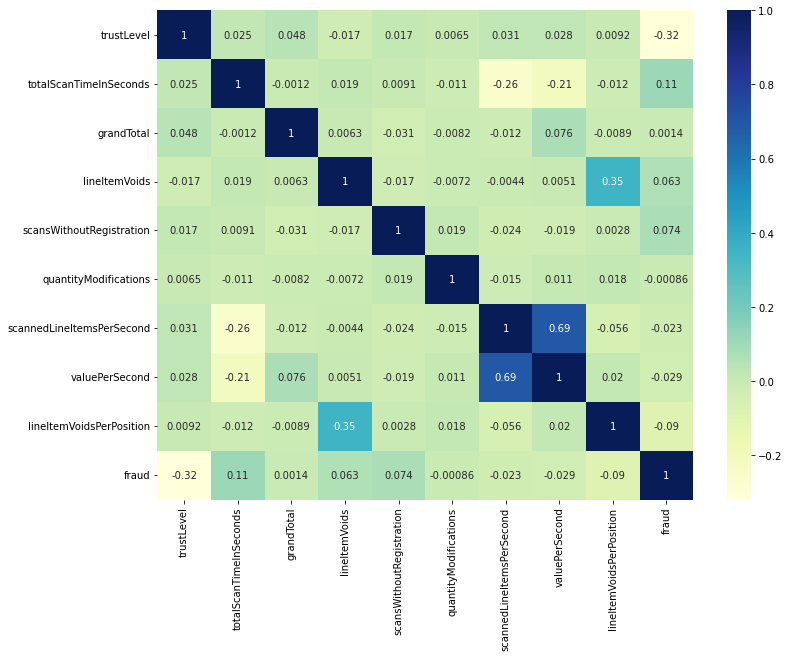

In [23]:
plt.figure(figsize=(12, 9))
print('heatmap of the correlation matrix ')
dataplot = sns.heatmap(data.corr(), cmap="YlGnBu", annot=True) #rainbow

In [24]:
X = data.drop('fraud', axis=1)  
y = data['fraud']  

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42)

In [26]:
print(X_train.shape)
print(X_test.shape)

(1503, 9)
(376, 9)


In [27]:
state=np.random.RandomState(42)
model=IsolationForest(n_estimators=200,contamination=outlier_fraction,random_state=state,verbose=0)

In [28]:
model.fit(X_train,y_train)

IsolationForest(contamination=0.05859154929577465, n_estimators=200,
                random_state=RandomState(MT19937) at 0x2B16BA4D340)

In [29]:
Y_pred=model.predict(X_test)

In [30]:
Y_pred[Y_pred==1]=0
Y_pred[Y_pred==-1]=1

In [31]:
print(accuracy_score(y_test, Y_pred))
print('\n\n\n')
print(confusion_matrix(y_test, Y_pred))
print('\n\n\n')
print(classification_report(y_test, Y_pred))

0.9042553191489362




[[340  22]
 [ 14   0]]




              precision    recall  f1-score   support

           0       0.96      0.94      0.95       362
           1       0.00      0.00      0.00        14

    accuracy                           0.90       376
   macro avg       0.48      0.47      0.47       376
weighted avg       0.92      0.90      0.91       376



In [32]:
rf=RandomForestClassifier(n_estimators=300)

In [33]:
rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=300)

In [34]:
y_pred=rf.predict(X_test)

In [35]:
print(accuracy_score(y_test, y_pred))
print('\n\n\n')
print(confusion_matrix(y_test, y_pred))
print('\n\n\n')
print(classification_report(y_test, y_pred))

0.9680851063829787




[[357   5]
 [  7   7]]




              precision    recall  f1-score   support

           0       0.98      0.99      0.98       362
           1       0.58      0.50      0.54        14

    accuracy                           0.97       376
   macro avg       0.78      0.74      0.76       376
weighted avg       0.97      0.97      0.97       376



In [36]:
dt = DecisionTreeClassifier()
dtree = dt.fit(X_train, y_train)

In [37]:
predictions = dt.predict(X_test)
print(accuracy_score(y_test, predictions))
print('\n\n\n')
print(confusion_matrix(y_test, predictions))
print('\n\n\n')
print(classification_report(y_test, predictions))

0.976063829787234




[[356   6]
 [  3  11]]




              precision    recall  f1-score   support

           0       0.99      0.98      0.99       362
           1       0.65      0.79      0.71        14

    accuracy                           0.98       376
   macro avg       0.82      0.88      0.85       376
weighted avg       0.98      0.98      0.98       376



In [38]:
col = ['trustLevel', 'totalScanTimeInSeconds', 'grandTotal', 'lineItemVoids', 'scansWithoutRegistration', 'quantityModifications', 'scannedLineItemsPerSecond', 'valuePerSecond', 'lineItemVoidsPerPosition']

In [39]:
dummy = pd.DataFrame([[5,834,80.64,0,10,3,0.01558753,0.096690647,0]], columns = col )  
dummy

,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition
0,5,834,80.64,0,10,3,0.015588,0.096691,0


In [40]:
dummypred = dt.predict(dummy)
dummypred

array([0], dtype=int64)